In [38]:
# Fazer os indicadores e novas variaveis (Excel ou Python)
# Fazer o GROUP BY (SQL ou Python)
# Fazer análises de acordo com o GROUP BY
# Fazer gráficos
# Fazer dashboards para cada produto ???

### Importando bibliotecas e lendo arquivos

In [39]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Lendo arquivo e alocando em uma variavel
base_estoque = pd.read_excel('arquivos_base/base_estoque.xlsx')

### (ETL) Entendo a tabela e ja fazendo alterações:

#### Vizualizando a tabela:

In [41]:
#Dando uma olhada por cima da tabela
base_estoque

,Descrição,Portfólio,Estoque Inicial,Entrada,Saída,Estoque Final,Estoque Inicial.1,Entrada.1,Saída.1,Estoque Final.1,Custo Unitário,# Vendas Projetadas - 12 meses
0,Jade Refil Difusor Ambiente 250ml,PERFUMARIA CASA,600,229.0,400.0,429,27040.27,10373.66,18098.34,19315.59,45.024685,2347
1,Jade Vela TB Cristal 190G,PERFUMARIA CASA,7,NaN,NaN,7,203.97,NaN,NaN,203.97,29.138571,4
2,Jade Sabonete Barra 150G,PERFUMARIA CASA,1989,147.0,409.0,1727,21665.00,1602.78,4459.23,18808.55,10.890880,3084
3,Copo Short Drink Búzios Transparente,TABLEWARE,407,0.0,17.0,390,19637.62,0.00,821.27,18816.35,48.247051,472
4,Copo Long Drink Búzios Transparente,TABLEWARE,204,27.0,55.0,176,10034.31,1328.07,2705.34,8657.04,49.187727,494
...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Prancha de Surf Copacabana,TABLEWARE,0,3.0,4.0,-1,0.00,4085.00,2042.50,2042.50,-2042.500000,0
2211,Taça Mar,TABLEWARE,0,232.0,92.0,140,0.00,7825.36,3103.16,4722.20,33.730000,70
2212,Copo Short Drink Mar,TABLEWARE,0,234.0,92.0,142,0.00,7200.18,2830.84,4369.34,30.770000,71
2213,Xícara de Chá Copacabana,TABLEWARE,0,120.0,120.0,0,0.00,0.00,0.00,0.00,0.000000,0


In [42]:
#Entendo o tamanho da tabela
base_estoque.shape

(2215, 12)

#### Vizualizando os types e alterando:

In [43]:
# Entendendo os types dos dados
base_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Descrição                       2215 non-null   object 
 1   Portfólio                       2215 non-null   object 
 2   Estoque Inicial                 2215 non-null   int64  
 3   Entrada                         1639 non-null   float64
 4   Saída                           1639 non-null   float64
 5   Estoque Final                   2215 non-null   int64  
 6   Estoque Inicial.1               2215 non-null   float64
 7   Entrada.1                       1639 non-null   float64
 8   Saída.1                         1639 non-null   float64
 9   Estoque Final.1                 2215 non-null   float64
 10  Custo Unitário                  2215 non-null   float64
 11  # Vendas Projetadas - 12 meses  2215 non-null   int64  
dtypes: float64(7), int64(3), object(2)

In [44]:
# Transformando object em string para ser mais facil na hora de transferir para o SQL e não dar incompatibilidade.

# Transformando Descrição
base_estoque['Descrição'] = base_estoque['Descrição'].astype(pd.StringDtype())

# Transoformando Portfólio
base_estoque['Portfólio'] = base_estoque['Portfólio'].astype(pd.StringDtype())

In [45]:
# Averiquando se está correto a transformação
base_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Descrição                       2215 non-null   string 
 1   Portfólio                       2215 non-null   string 
 2   Estoque Inicial                 2215 non-null   int64  
 3   Entrada                         1639 non-null   float64
 4   Saída                           1639 non-null   float64
 5   Estoque Final                   2215 non-null   int64  
 6   Estoque Inicial.1               2215 non-null   float64
 7   Entrada.1                       1639 non-null   float64
 8   Saída.1                         1639 non-null   float64
 9   Estoque Final.1                 2215 non-null   float64
 10  Custo Unitário                  2215 non-null   float64
 11  # Vendas Projetadas - 12 meses  2215 non-null   int64  
dtypes: float64(7), int64(3), string(2)

#### Visualizando nulls e valores nulos (0), e tomando decisões:

In [46]:
# Identificando a quantidade de nulls de duas formas, a forma " " e a forma "(vazio)"

#retorna o número de valores ausentes na forma " " para cada coluna.
base_estoque.isna().sum()

Descrição                           0
Portfólio                           0
Estoque Inicial                     0
Entrada                           576
Saída                             576
Estoque Final                       0
Estoque Inicial.1                   0
Entrada.1                         576
Saída.1                           576
Estoque Final.1                     0
Custo Unitário                      0
# Vendas Projetadas - 12 meses      0
dtype: int64

Coméntario:

Dando uma olhada pelo excel, onde é mais facil a vizualização da tabela como um todo neste caso. Os nulos no formato ' ' só ocorrem quando não a alteração no estoque (estoque inicial = estoque final), portanto no caso esses nulos tem valor de négocio.

OBS: Acontece uma situação pararecida quando em relação a '-' (0), já que quando somente uma alteração no estoque acontece seja ela 'entrada' ou 'saída' ocorre que a outra parte sendo ela 'entrada' ou 'saída' será '-' (0). Assim o valor '-' = 0, é relevante para o négocio.

In [47]:
#Calculando a quantidade de '(vazio)' por coluna

#Criando dicionario para armazenar a contagem de '(vazio)' por coluna
contagens_por_coluna = {}

#Contando '(vazio)' por coluna
for coluna in base_estoque.columns:
    contagem = base_estoque[coluna].astype(str).str.count('(vazio)').sum()
    contagens_por_coluna[coluna] = contagem

#Mostrando a contagem
print("Contagem de '(vazio)' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

#Identificando as dimensões para ver se foi corretamente excluido posteriormente
print('')
print('Dimensões:')
print(base_estoque.shape)

Contagem de '(vazio)' em cada coluna:
Descrição: 38
Portfólio: 0
Estoque Inicial: 0
Entrada: 0
Saída: 0
Estoque Final: 0
Estoque Inicial.1: 0
Entrada.1: 0
Saída.1: 0
Estoque Final.1: 0
Custo Unitário: 0
# Vendas Projetadas - 12 meses: 0

Dimensões:
(2215, 12)


Coméntario:

Também Dando uma olhada pelo excel. É possível notar que os valores nulos no formato '(vazio)' presentes só na coluna descrição acarretam em 'linhas mortas'. 'Linhas mortas' essas que possuem dados nas colunas 'Entrada', 'Saída', 'Estoque Inicial', 'Estoque Final', mas por não possuiem a descrição do produto, portanto essas colunas acabam por não ter valor de négocio. O que poderia ser feito para corrigir isso seria: Ou entrar em contato com a fonte dos dados para ajustar esses detalhes e recuperar informações. Ou assumir que será perdido determinada quantidade de informações e excluir as linhas. Nesse caso como eu não tenho contato com a fonte dos dados, vou excluir essas linhas e continuar a análise.

OBS: Estou mantendo a versão antes da análise da tabela em um repositorio privado, e em caso de necessidade é possível recuperar este dataframe.

In [48]:
#Derrubando as linhas que possuem valores nulos no formato '(vazio)' na coluna 'Descrição'

base_estoque = base_estoque[base_estoque['Descrição'] != '(vazio)']
    

In [49]:
#Averiguando se foi excluido as linhas corretamente
contagens_por_coluna = {}

for coluna in base_estoque.columns:
    contagem = base_estoque[coluna].astype(str).str.count('(vazio)').sum()
    contagens_por_coluna[coluna] = contagem

print("Contagem de '(vazio)' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

print('')
print('Dimensões:')
print(base_estoque.shape)

Contagem de '(vazio)' em cada coluna:
Descrição: 0
Portfólio: 0
Estoque Inicial: 0
Entrada: 0
Saída: 0
Estoque Final: 0
Estoque Inicial.1: 0
Entrada.1: 0
Saída.1: 0
Estoque Final.1: 0
Custo Unitário: 0
# Vendas Projetadas - 12 meses: 0

Dimensões:
(2177, 12)


#### Entendendo cada coluna:

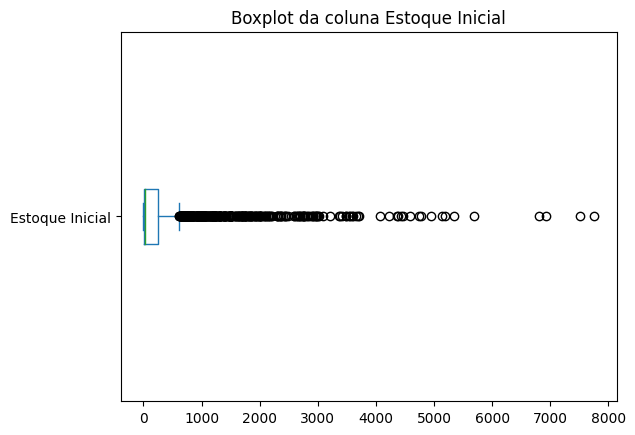

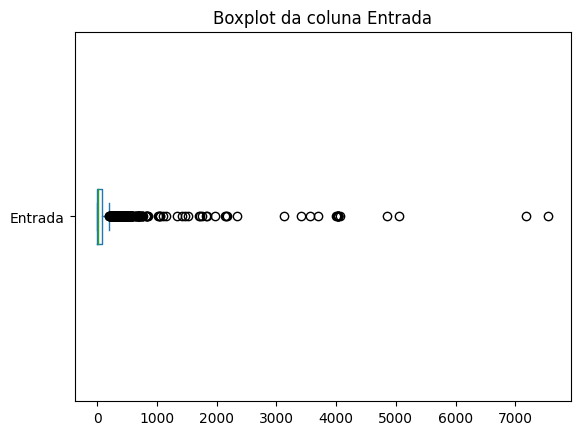

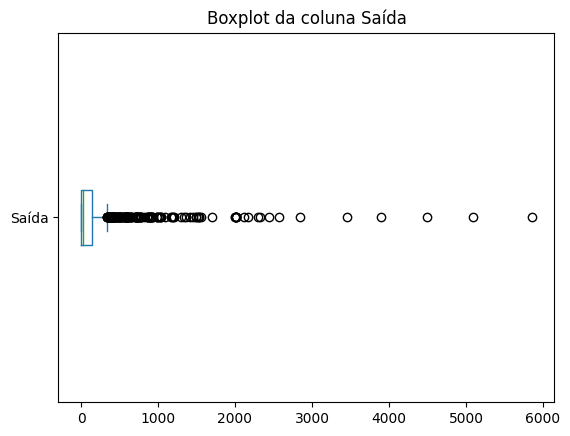

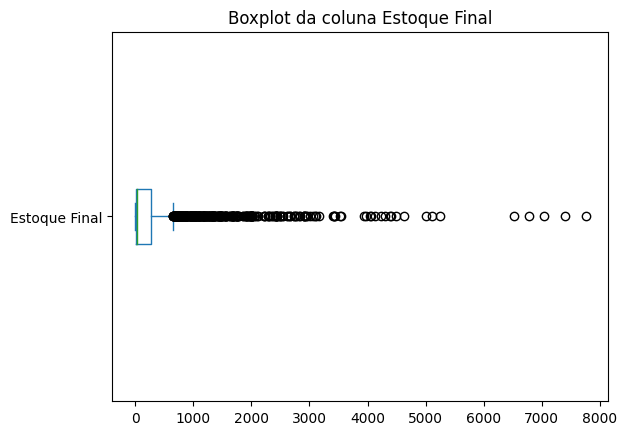

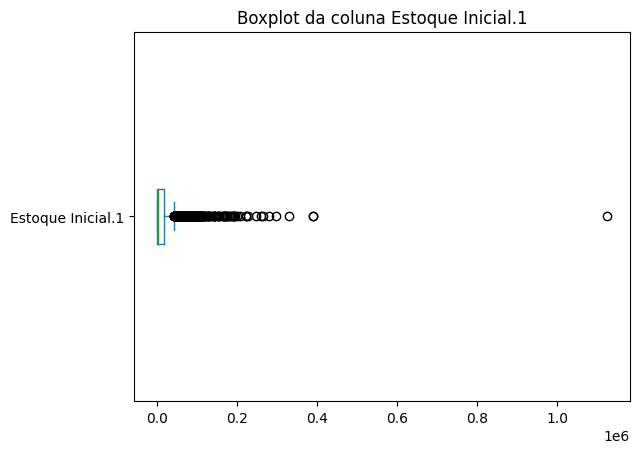

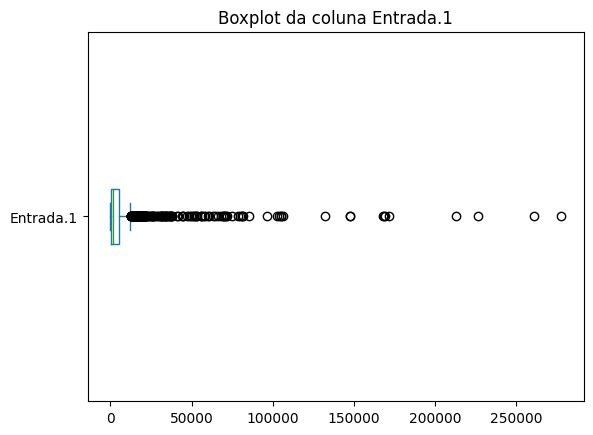

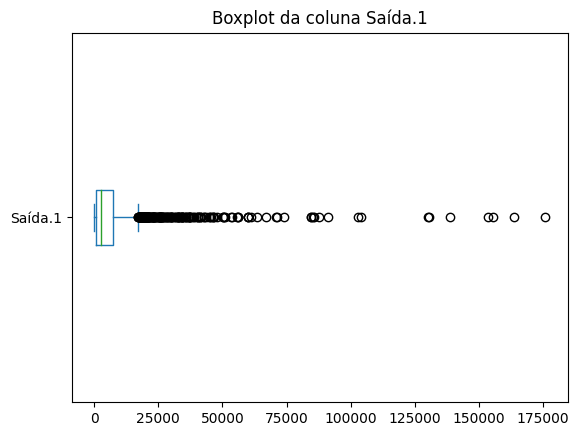

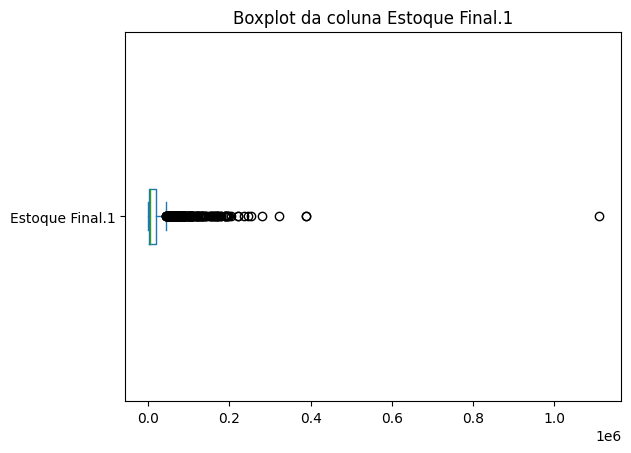

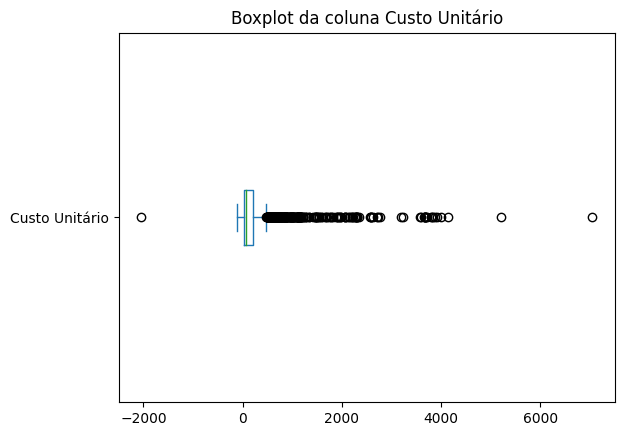

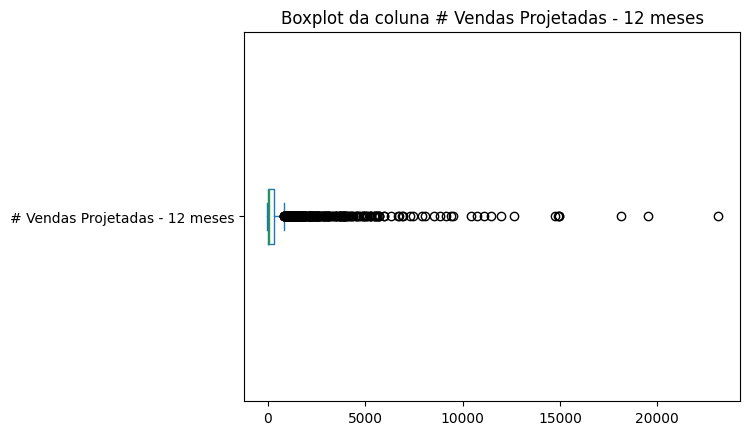

In [50]:
# Criando boxplot para cada coluna para ver se estão de acordo.

# Crie um boxplot para cada coluna numérica
for coluna in base_estoque.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    base_estoque[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

In [66]:
# Trançando os valores mínimos e máximos de cada coluna

print('Valores mínimos de acordo com cada coluna:')
print("")
for coluna in base_estoque.select_dtypes(include='number'):
    print(f'{coluna}: ')
    print(base_estoque[coluna].min())

print("")
print("")
print('Valores máximos de acordo com cada coluna:')
print("")
for coluna in base_estoque.select_dtypes(include='number'):
    print(f'{coluna}: ')
    print(base_estoque[coluna].max())

Valores mínimos de acordo com cada coluna:

Estoque Inicial: 
-3
Entrada: 
0.0
Saída: 
0.0
Estoque Final: 
-8
Estoque Inicial.1: 
-498.68
Entrada.1: 
0.0
Saída.1: 
0.0
Estoque Final.1: 
-498.68
Custo Unitário: 
-119.49
# Vendas Projetadas - 12 meses: 
-57


Valores máximos de acordo com cada coluna:

Estoque Inicial: 
7757
Entrada: 
7547.0
Saída: 
5857.0
Estoque Final: 
7757
Estoque Inicial.1: 
1125065.68
Entrada.1: 
277868.36
Saída.1: 
175884.72
Estoque Final.1: 
1109446.3199999998
Custo Unitário: 
7042.92
# Vendas Projetadas - 12 meses: 
23102


Coméntario:

Com esses resultados de Boxplots, mínimo e máximos valores, é possivel ver que as colunas fazem sentido, e a grande quantidade de outsiders no boxplots támbem fazem sentido já que são diversos produtos. O único detalhe que não faz sentido, são os valores negativos em determinadas colunas.

Aprofundando mais na incorrência. Ela pode ser explicada por perda produtos no decorrer do armazenamento no estoque.

### Exportando a base ou criando colunas